In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [6]:
import csv

def load_csv(filename):
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        data = [row for row in reader]
    return data

# Parameters
n_photons = 300000    # Example number of photons, change as needed

# Load data from CSV files
all_trajs_x = load_csv(f'all_trajs_x_large_{n_photons}.csv')
all_trajs_y = load_csv(f'all_trajs_y_large_{n_photons}.csv')
no_sensor_dist = [float(d[0]) for d in load_csv(f'no_sensor_dist_large_{n_photons}.csv')]  # Flatten the array
no_sensor_times = [float(t[0]) for t in load_csv(f'no_sensor_times_large_{n_photons}.csv')]  # Flatten the array
traj_times = [float(t[0]) for t in load_csv(f'traj_times_large_{n_photons}.csv')]  # Flatten the array
traj_dist = [float(d[0]) for d in load_csv(f'traj_dist_large_{n_photons}.csv')]  # Flatten the array
sensor_hits = [int(s[0]) for s in load_csv(f'sensor_hits_large_{n_photons}.csv')]  # Flatten the array
sensor_hit_times = [float(t[0]) for t in load_csv(f'sensor_hit_times_large_{n_photons}.csv')]  # Flatten the array
sensor_dist = [float(d[0]) for d in load_csv(f'sensor_dist_large_{n_photons}.csv')]  # Flatten the array
sensor_trajs_x = load_csv(f'sensor_trajs_x_large_{n_photons}.csv')
sensor_trajs_y = load_csv(f'sensor_trajs_y_large_{n_photons}.csv')

# Convert lists of lists to NumPy arrays if needed
all_trajs_x = [list(map(float, traj)) for traj in all_trajs_x]
all_trajs_y = [list(map(float, traj)) for traj in all_trajs_y]
sensor_trajs_x = [list(map(float, traj)) for traj in sensor_trajs_x]
sensor_trajs_y = [list(map(float, traj)) for traj in sensor_trajs_y]

# Print loaded data shapes for verification
print("all_trajs_x length:", len(all_trajs_x))
print("all_trajs_y length:", len(all_trajs_y))
print("no_sensor_dist length:", len(no_sensor_dist))
print("no_sensor_times length:", len(no_sensor_times))
print("traj_times length:", len(traj_times))
print("traj_dist length:", len(traj_dist))
print("sensor_hits length:", len(sensor_hits))
print("sensor_hit_times length:", len(sensor_hit_times))
print("sensor_dist length:", len(sensor_dist))
print("sensor_trajs_x length:", len(sensor_trajs_x))
print("sensor_trajs_y length:", len(sensor_trajs_y))


all_trajs_x length: 300000
all_trajs_y length: 300000
no_sensor_dist length: 277124
no_sensor_times length: 277124
traj_times length: 300000
traj_dist length: 300000
sensor_hits length: 22876
sensor_hit_times length: 22876
sensor_dist length: 22876
sensor_trajs_x length: 22876
sensor_trajs_y length: 22876


In [7]:
# Plot all trajectories
counter =0
for traj_x, traj_y in zip(all_trajs_x, all_trajs_y):
    if counter < 2: 
        print(traj_x, traj_y)
    else:
        break
    counter += 1

[30.0, 28.09141347582454, 26.90189245830802] [30.0, 30.120813366682857, 30.703838146325964]
[30.0, 34.460372548699034] [30.0, 28.365726148895057]


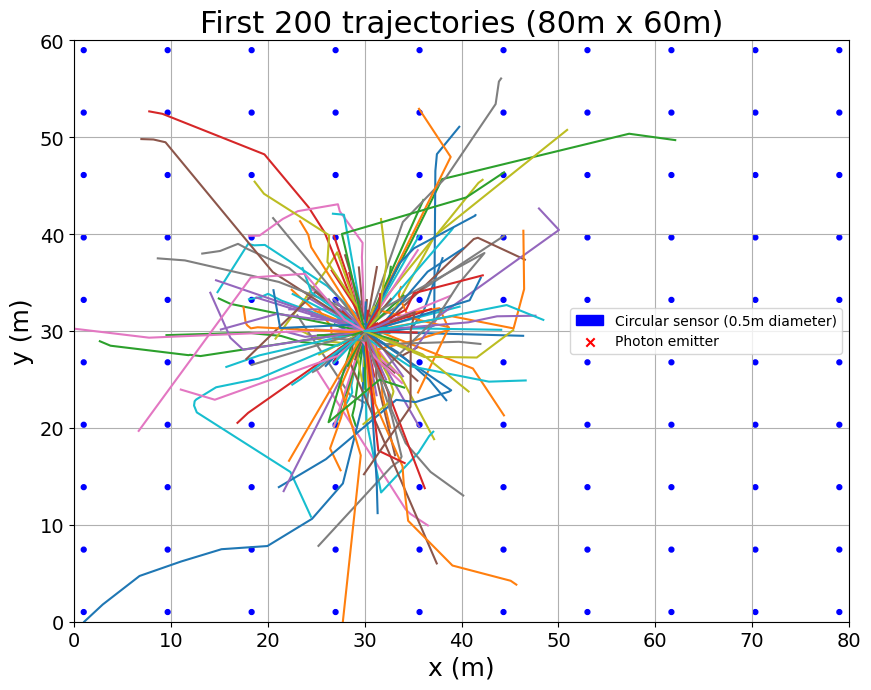

In [16]:
# Plotting the sensor hits and trajectories
fig, ax = plt.subplots(figsize=(10, 10))

detec_x = 80
detec_y = 60
sensor_d = .5
n_sensors = 144
g = 0.8  # Henyey-Greenstein asymmetry parameter

sensor_x, sensor_y = 30, 30

ax.set_xlim(0, detec_x)
ax.set_ylim(0, detec_y)
sensor_centers = [(x, y) for x in np.linspace(2 * sensor_d, detec_x - 2 * sensor_d, 10) for y in np.linspace(2 * sensor_d, detec_y - 2 * sensor_d, 10)]
sensor_r = sensor_d / 2

for i, (x, y) in enumerate(sensor_centers):
    if i == 0:
        circle = plt.Circle((x, y), sensor_r, color='b', fill=True, label='Circular sensor (0.5m diameter)')
    else:
        circle = plt.Circle((x, y), sensor_r, color='b', fill=True)
    ax.add_patch(circle)

# Plot the emitter position


# Plot all trajectories
counter = 0
for traj_x, traj_y in zip(all_trajs_x, all_trajs_y):
    if counter < 200:
        plt.plot(traj_x, traj_y)
    else:
        break
    counter += 1


plt.scatter(sensor_x, sensor_y, color='r', marker='x', label='Photon emitter')
# Set font size for tick mark
ax.tick_params(axis='both', which='major', labelsize=14)

# Show plot
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x (m)', fontsize=18)
plt.ylabel('y (m)', fontsize=18)
plt.title(f'First 200 trajectories (80m x 60m)', fontsize=22)
plt.grid(True)
plt.legend()
plt.show()


277124 277124 9.927448349626356


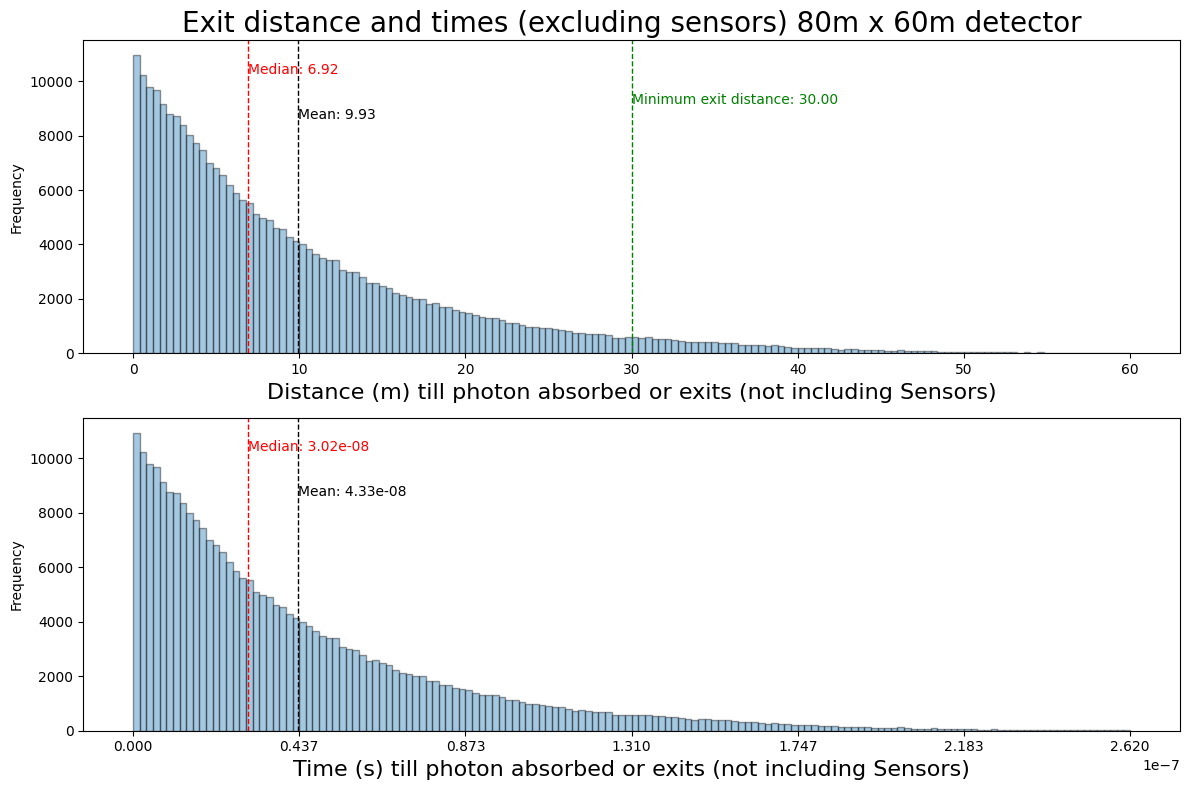

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
speed_of_light = 3e8  # Speed of light in m/s
speed_of_light_ice = speed_of_light / 1.31  # Speed of light in ice

# Assuming no_sensor_dist and no_sensor_times are defined as lists

# Convert lists to NumPy arrays for element-wise operations
no_sensor_dist = np.array(no_sensor_dist)
no_sensor_times = np.array(no_sensor_times)
print(len(no_sensor_dist), len(no_sensor_times), np.mean(no_sensor_dist))
median_exit_distance = np.median(no_sensor_dist)
mean_exit_dist = np.mean(no_sensor_dist)
median_exit_time = np.median(no_sensor_times)
mean_exit_time = np.mean(no_sensor_times)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Define custom bins for distance
bin_width = 0.4 # You can change this to your desired bin width
distance_bins = np.arange(0, 60 + bin_width, bin_width)

# Distance histogram
ax1.hist(no_sensor_dist, alpha=0.4, bins=distance_bins, edgecolor='black')
ax1.axvline(median_exit_distance, color='r', linestyle='dashed', linewidth=1)
ax1.text(median_exit_distance, max(np.histogram(no_sensor_dist, bins=distance_bins)[0]) * 0.95, f'Median: {median_exit_distance:.2f}', color='r', ha='left', va='center')

ax1.axvline(mean_exit_dist, color='black', linestyle='dashed', linewidth=1)
ax1.text(mean_exit_dist, max(np.histogram(no_sensor_dist, bins=distance_bins)[0]) * 0.80, f'Mean: {mean_exit_dist:.2f}', color='black', ha='left', va='center')

ax1.axvline(30, color='g', linestyle='dashed', linewidth=1)
ax1.text(30, max(np.histogram(no_sensor_dist, bins=distance_bins)[0]) * 0.85, f'Minimum exit distance: {30:.2f}', color='g', ha='left', va='center')

ax1.set_xlabel("Distance (m) till photon absorbed or exits (not including Sensors)", fontsize = 16)
ax1.set_ylabel("Frequency")
ax1.set_title("Exit distance and times (excluding sensors) 80m x 60m detector", fontsize =20)

# Set custom x-ticks for distance
ax1.set_xticks(np.arange(0, 61, 10))

# Define custom bins for time
time_bins = distance_bins / speed_of_light_ice

# Time histogram
ax2.hist(no_sensor_times, alpha=0.4, bins=time_bins, edgecolor='black')
ax2.axvline(median_exit_time, color='r', linestyle='dashed', linewidth=1)
ax2.text(median_exit_time, max(np.histogram(no_sensor_times, bins=time_bins)[0]) * 0.95, f'Median: {median_exit_time:.2e}', color='r', ha='left', va='center')

ax2.axvline(mean_exit_time, color='black', linestyle='dashed', linewidth=1)
ax2.text(mean_exit_time, max(np.histogram(no_sensor_times, bins=time_bins)[0]) * 0.80, f'Mean: {mean_exit_time:.2e}', color='black', ha='left', va='center')

# Set custom x-ticks for time
distance_ticks = np.arange(0, 61, 10)
time_ticks = distance_ticks / speed_of_light_ice

ax2.set_xticks(time_ticks)
#ax2.set_xticklabels([f'{dist:.2f}' for dist in distance_ticks])

ax2.set_xlabel("Time (s) till photon absorbed or exits (not including Sensors)", fontsize = 16)
ax2.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


10001 10001 9.550761028899831


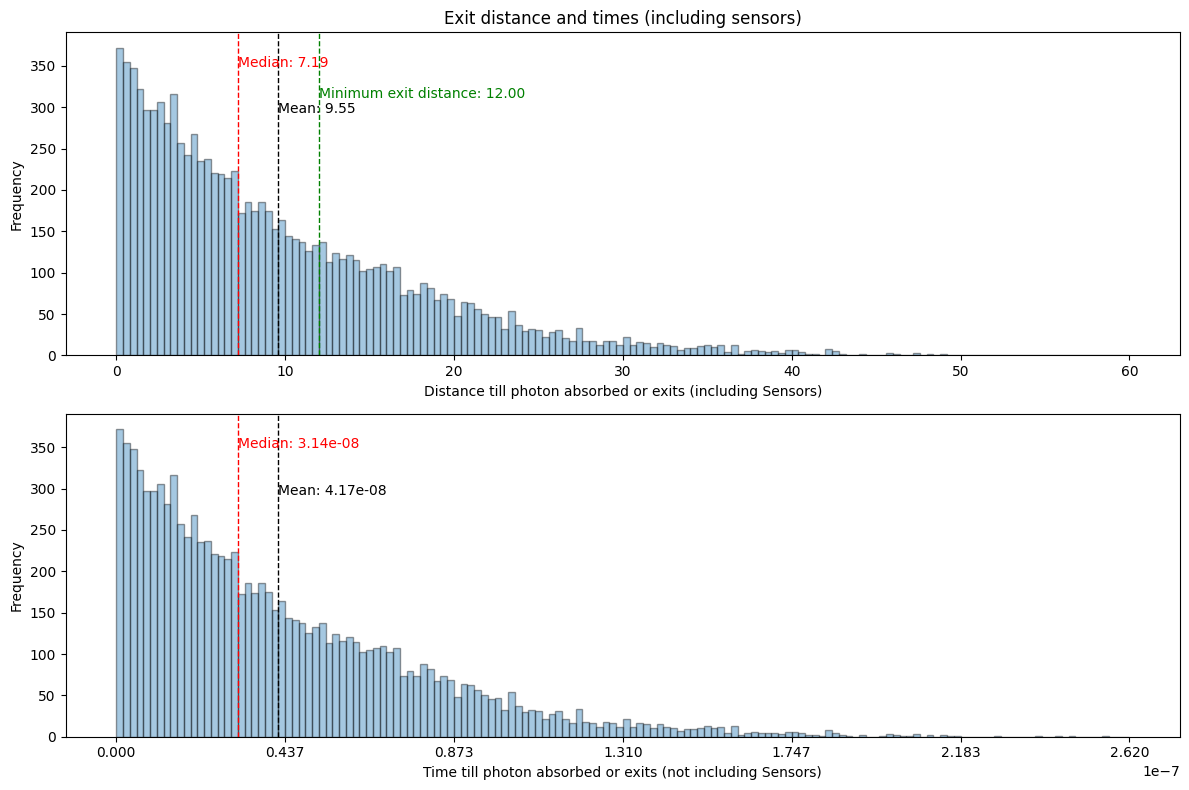

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
speed_of_light = 3e8  # Speed of light in m/s
speed_of_light_ice = speed_of_light / 1.31  # Speed of light in ice

# Assuming no_sensor_dist and no_sensor_times are defined as lists

# Convert lists to NumPy arrays for element-wise operations
no_sensor_dist = np.array(traj_dist)
no_sensor_times = np.array(traj_times)
print(len(no_sensor_dist), len(no_sensor_times), np.mean(no_sensor_dist))


median_exit_distance = np.median(no_sensor_dist)
mean_exit_dist = np.mean(no_sensor_dist)
median_exit_time = np.median(no_sensor_times)
mean_exit_time = np.mean(no_sensor_times)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Define custom bins for distance
bin_width = 0.4 # You can change this to your desired bin width
distance_bins = np.arange(0, 60 + bin_width, bin_width)

# Distance histogram
ax1.hist(no_sensor_dist, alpha=0.4, bins=distance_bins, edgecolor='black')
ax1.axvline(median_exit_distance, color='r', linestyle='dashed', linewidth=1)
ax1.text(median_exit_distance, max(np.histogram(no_sensor_dist, bins=distance_bins)[0]) * 0.95, f'Median: {median_exit_distance:.2f}', color='r', ha='left', va='center')

ax1.axvline(mean_exit_dist, color='black', linestyle='dashed', linewidth=1)
ax1.text(mean_exit_dist, max(np.histogram(no_sensor_dist, bins=distance_bins)[0]) * 0.80, f'Mean: {mean_exit_dist:.2f}', color='black', ha='left', va='center')

ax1.axvline(12, color='g', linestyle='dashed', linewidth=1)
ax1.text(12, max(np.histogram(no_sensor_dist, bins=distance_bins)[0]) * 0.85, f'Minimum exit distance: {12:.2f}', color='g', ha='left', va='center')

ax1.set_xlabel("Distance till photon absorbed or exits (including Sensors)")
ax1.set_ylabel("Frequency")
ax1.set_title("Exit distance and times (including sensors)")

# Set custom x-ticks for distance
ax1.set_xticks(np.arange(0, 61, 10))

# Define custom bins for time
time_bins = distance_bins / speed_of_light_ice

# Time histogram
ax2.hist(no_sensor_times, alpha=0.4, bins=time_bins, edgecolor='black')
ax2.axvline(median_exit_time, color='r', linestyle='dashed', linewidth=1)
ax2.text(median_exit_time, max(np.histogram(no_sensor_times, bins=time_bins)[0]) * 0.95, f'Median: {median_exit_time:.2e}', color='r', ha='left', va='center')

ax2.axvline(mean_exit_time, color='black', linestyle='dashed', linewidth=1)
ax2.text(mean_exit_time, max(np.histogram(no_sensor_times, bins=time_bins)[0]) * 0.80, f'Mean: {mean_exit_time:.2e}', color='black', ha='left', va='center')

# Set custom x-ticks for time
distance_ticks = np.arange(0, 61, 10)
time_ticks = distance_ticks / speed_of_light_ice

ax2.set_xticks(time_ticks)
#ax2.set_xticklabels([f'{dist:.2f}' for dist in distance_ticks])

ax2.set_xlabel("Time till photon absorbed or exits (not including Sensors)")
ax2.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


Shortest possible distance from the emitter to a sensor: 1.299368541872552
Shortest measured distance:  3.0021597420080663
num sensor hits:  1251   unique sensor hits:  1251


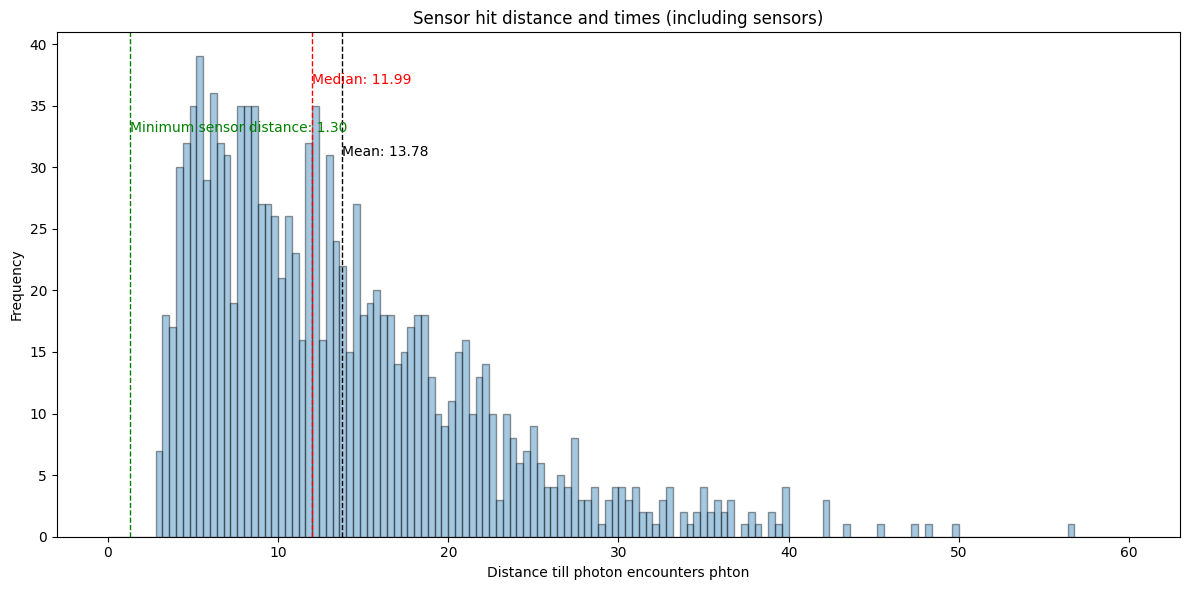

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
speed_of_light = 3e8  # Speed of light in m/s
speed_of_light_ice = speed_of_light / 1.31  # Speed of light in ice

# Calculate the Euclidean distance between the emitter and each sensor

emitter_coords = (12, 17)

sensor_radius = 0.15/2
def calculate_intersection_distance(emitter, sensor_center, radius):
    ex, ey = emitter
    sx, sy = sensor_center

    # Direction vector from emitter to sensor center
    dx = sx - ex
    dy = sy - ey

    # Quadratic coefficients
    a = dx**2 + dy**2
    b = 2 * (dx * (ex - sx) + dy * (ey - sy))
    c = (ex - sx)**2 + (ey - sy)**2 - radius**2

    # Discriminant
    discriminant = b**2 - 4*a*c

    if discriminant < 0:
        return float('inf')  # No intersection, return a large number

    # Calculate both intersection points
    t1 = (-b - np.sqrt(discriminant)) / (2*a)
    t2 = (-b + np.sqrt(discriminant)) / (2*a)

    # Choose the closer intersection point that lies on the line segment
    if 0 <= t1 <= 1:
        intersection_x1 = ex + t1 * dx
        intersection_y1 = ey + t1 * dy
        distance1 = np.sqrt((intersection_x1 - ex) ** 2 + (intersection_y1 - ey) ** 2)
    else:
        distance1 = float('inf')

    if 0 <= t2 <= 1:
        intersection_x2 = ex + t2 * dx
        intersection_y2 = ey + t2 * dy
        distance2 = np.sqrt((intersection_x2 - ex) ** 2 + (intersection_y2 - ey) ** 2)
    else:
        distance2 = float('inf')

    return min(distance1, distance2)

# Calculate distances to the sensor edges
distances = [calculate_intersection_distance(emitter_coords, sensor, sensor_radius) for sensor in sensor_centers]

# Find the shortest distance
shortest_distance = min(distances)

print("Shortest possible distance from the emitter to a sensor:", shortest_distance)

# Convert lists to NumPy arrays for element-wise operations
no_sensor_dist = np.array(sensor_dist)
no_sensor_times = np.array(sensor_dist)
print("Shortest measured distance: ", np.min(sensor_dist))
print("num sensor hits: ", len(sensor_dist), "  unique sensor hits: ", len(np.unique(sensor_dist)))


median_exit_distance = np.median(no_sensor_dist)
mean_exit_dist = np.mean(no_sensor_dist)
median_exit_time = np.median(no_sensor_times)
mean_exit_time = np.mean(no_sensor_times)


fig, ax1 = plt.subplots(figsize=(12, 6))



# Define custom bins for distance
bin_width = 0.4 # You can change this to your desired bin width
distance_bins = np.arange(0, 60 + bin_width, bin_width)

# Distance histogram
ax1.hist(no_sensor_dist, alpha=0.4, bins=distance_bins, edgecolor='black')
ax1.axvline(median_exit_distance, color='r', linestyle='dashed', linewidth=1)
ax1.text(median_exit_distance, max(np.histogram(no_sensor_dist, bins=distance_bins)[0]) * 0.95, f'Median: {median_exit_distance:.2f}', color='r', ha='left', va='center')

ax1.axvline(mean_exit_dist, color='black', linestyle='dashed', linewidth=1)
ax1.text(mean_exit_dist, max(np.histogram(no_sensor_dist, bins=distance_bins)[0]) * 0.80, f'Mean: {mean_exit_dist:.2f}', color='black', ha='left', va='center')

ax1.axvline(shortest_distance, color='g', linestyle='dashed', linewidth=1)
ax1.text(shortest_distance, max(np.histogram(no_sensor_dist, bins=distance_bins)[0]) * 0.85, f'Minimum sensor distance: {shortest_distance:.2f}', color='g', ha='left', va='center')

ax1.set_xlabel("Distance till photon encounters phton")
ax1.set_ylabel("Frequency")
ax1.set_title("Sensor hit distance and times (including sensors)")

# Set custom x-ticks for distance
ax1.set_xticks(np.arange(0, 61, 10))


plt.tight_layout()
plt.show()


plotting sensor hit times(s): 


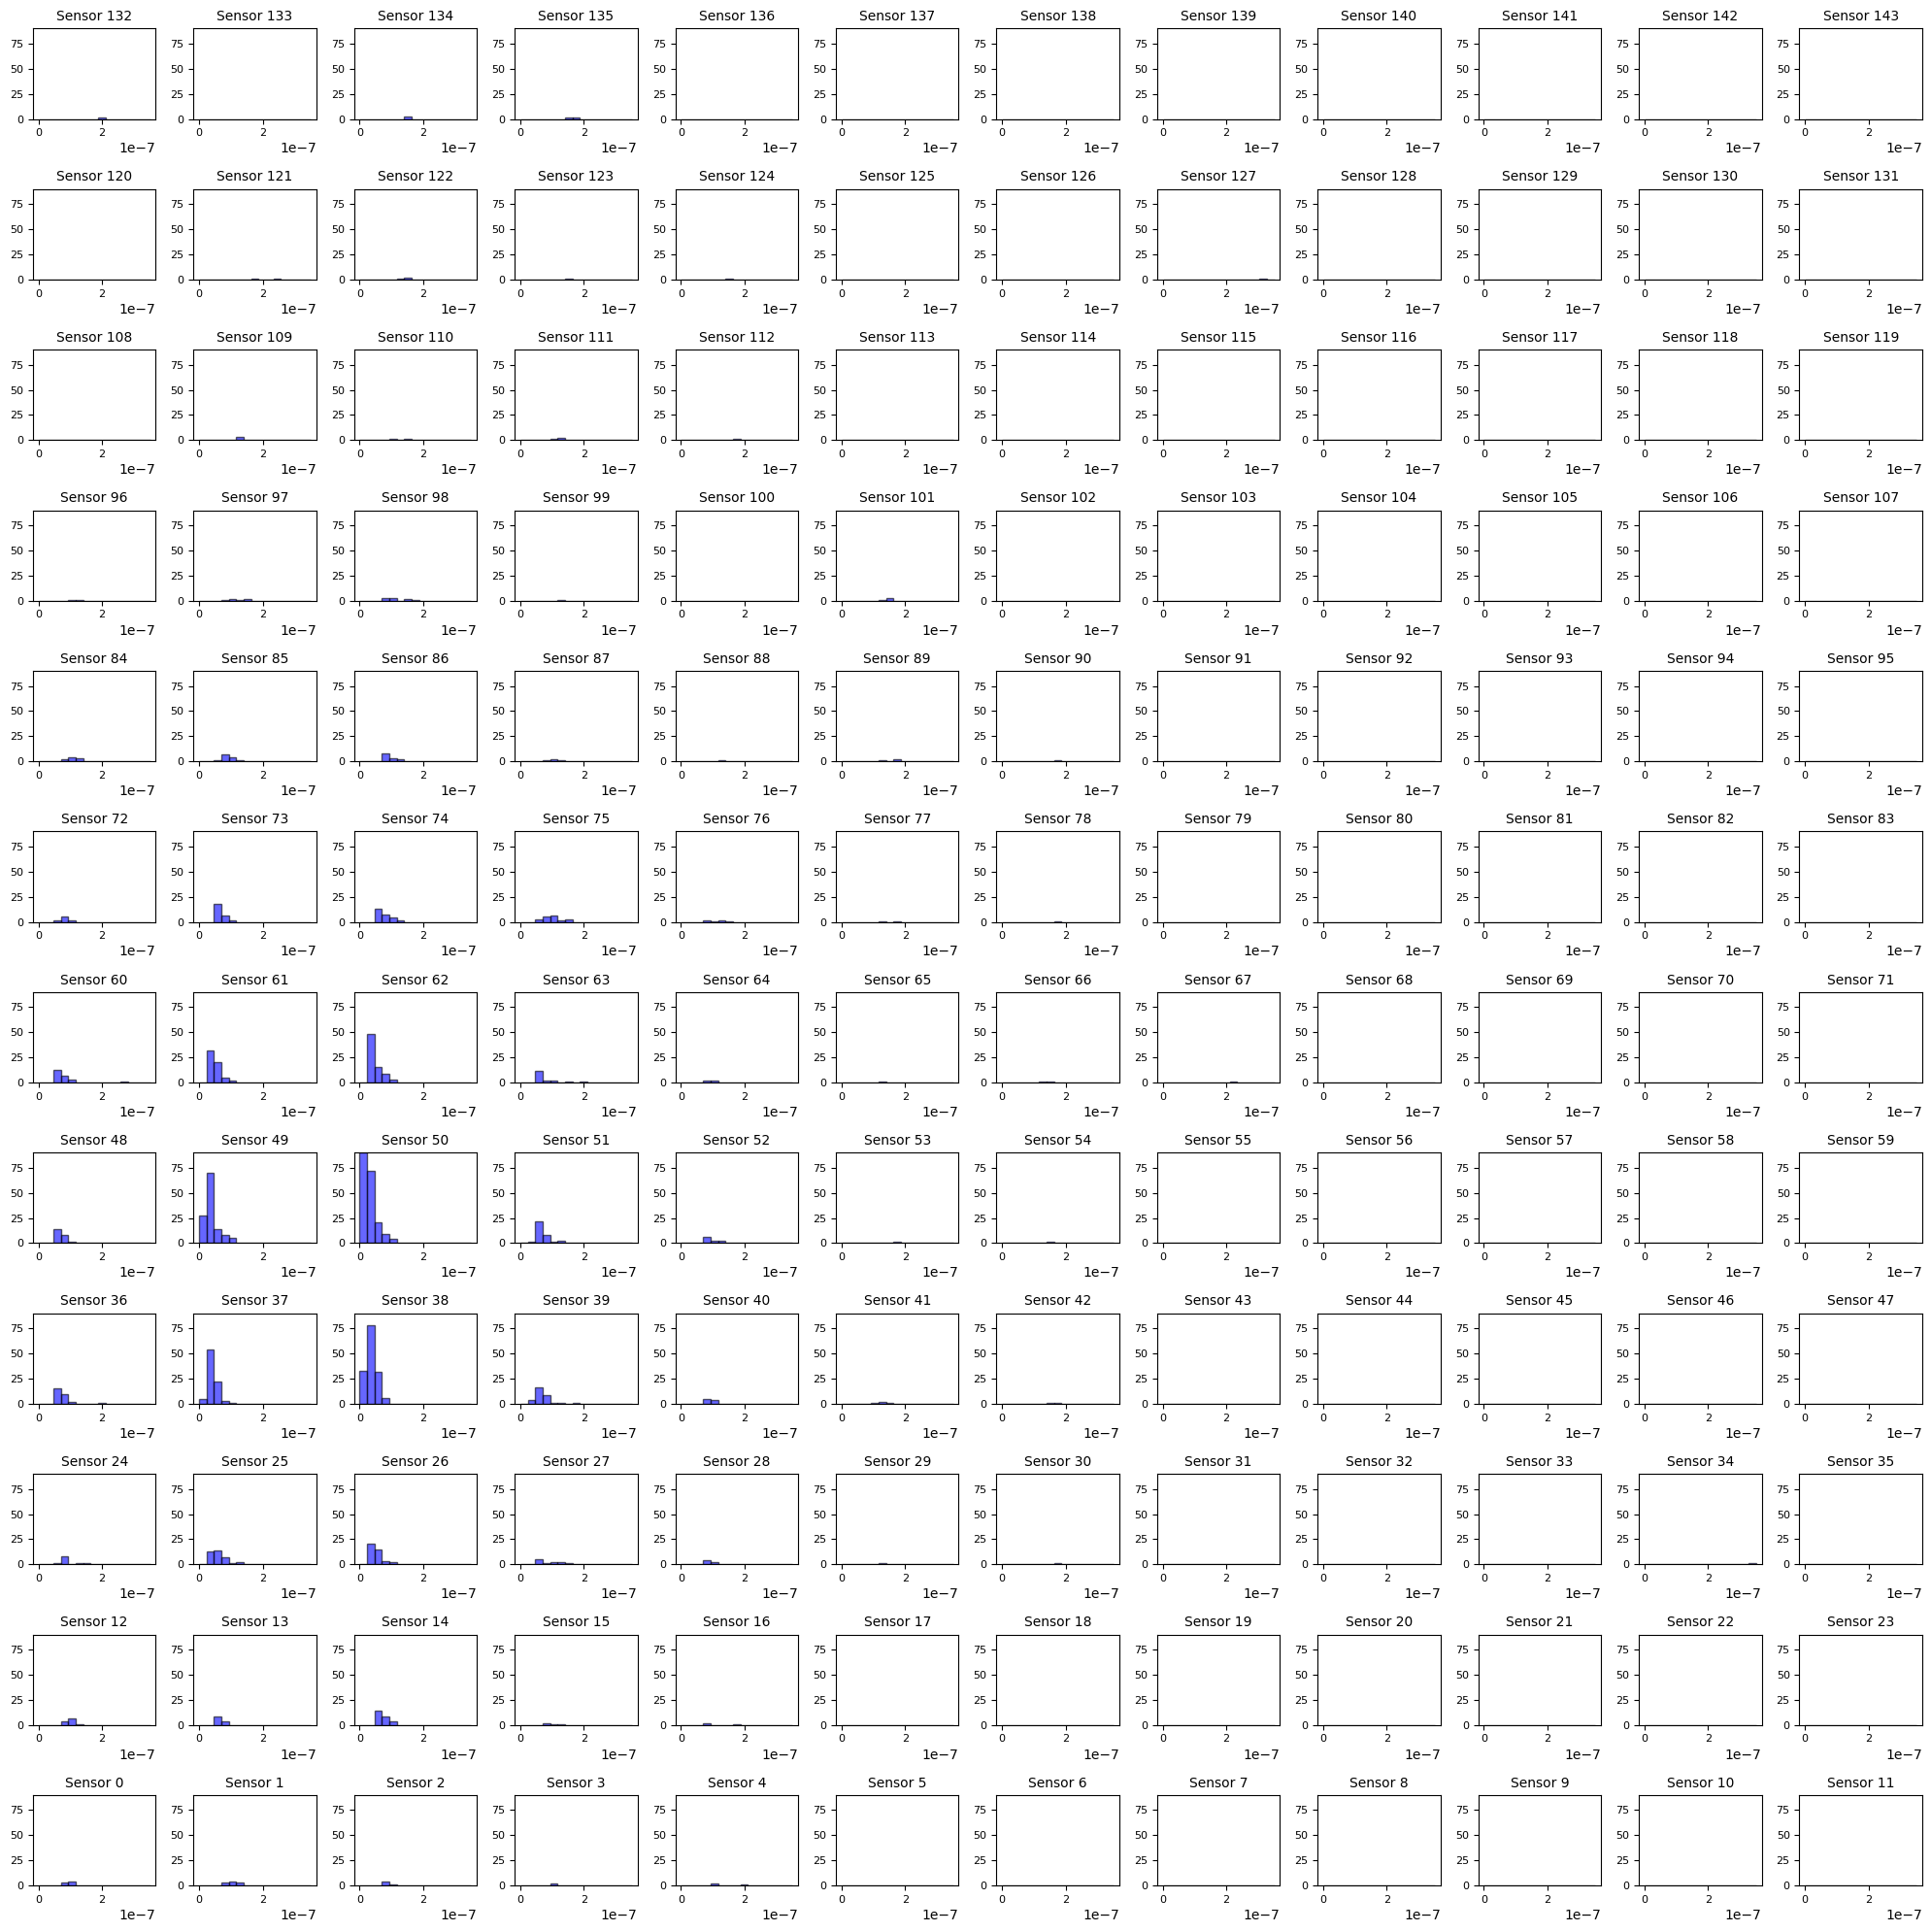

In [19]:
def index_to_grid(index, grid_size=12):
    row = grid_size - 1 - (index // grid_size)  # Invert the row index to start from the bottom
    col = index % grid_size
    return row, col

sensor_hit_dict = {i: [] for i in range(144)}

for hit, time in zip(sensor_hits, sensor_hit_times):
    sensor_hit_dict[hit].append(time)

fig, axes = plt.subplots(12, 12, figsize=(20, 20))

max_freq = 0
for i in range(144):
    counts, _ = np.histogram(sensor_hit_dict[i], bins=15, range=(0, max(sensor_hit_times)))
    max_freq = max(max_freq, max(counts))

for i in range(144):
    row, col = index_to_grid(i)
    axes[row, col].hist(sensor_hit_dict[i], bins=15, range=(0, max(sensor_hit_times)), alpha=0.6, color='blue', edgecolor='black')
    axes[row, col].set_title(f"Sensor {i}", fontsize=10)
    axes[row, col].set_ylim(0, max_freq)
    axes[row, col].tick_params(axis='both', which='major', labelsize=8)

# Adjust layout
print("plotting sensor hit times(s): ")
plt.tight_layout()
plt.show()

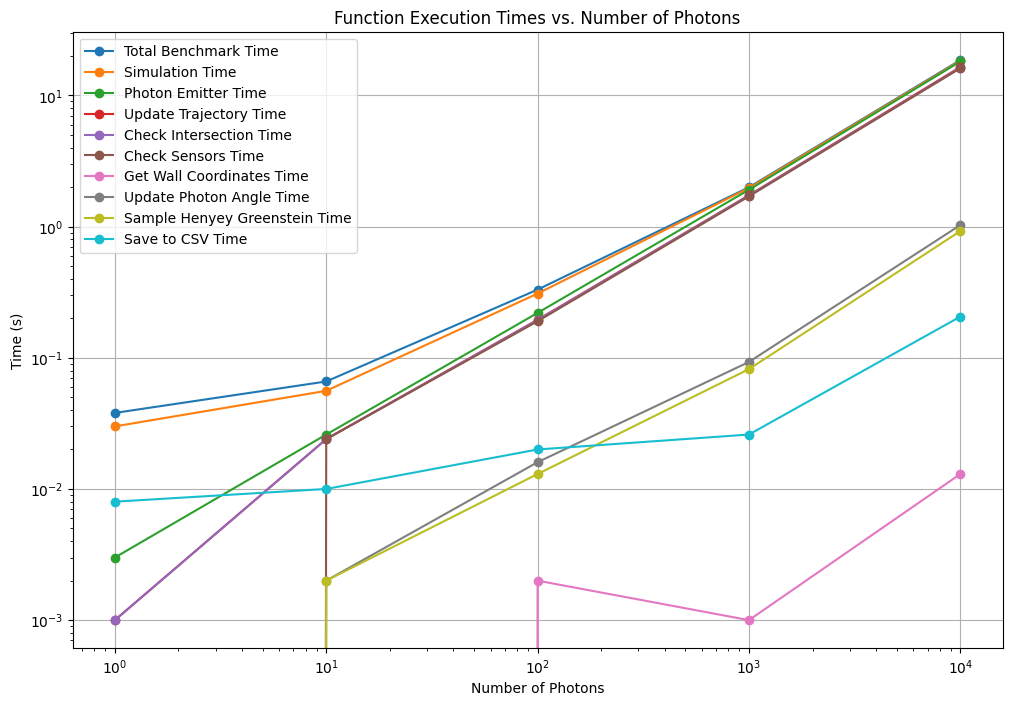

In [1]:
import matplotlib.pyplot as plt

# Data extracted from the provided output
photon_counts = [1, 10, 100, 1000, 10000]
benchmark_times = [0.038, 0.066, 0.331, 1.997, 18.608]
simulation_times = [0.030, 0.056, 0.309, 1.970, 18.395]
photon_emitter_times = [0.003, 0.026, 0.220, 1.911, 18.168]
update_traj_times = [0.001, 0.024, 0.195, 1.735, 16.473]
check_intersect_times = [0.001, 0.024, 0.194, 1.725, 16.275]
check_sensors_times = [0.000, 0.024, 0.190, 1.703, 16.137]
get_wall_coords_times = [0.000, 0.000, 0.002, 0.001, 0.013]
update_photon_angle_times = [0.000, 0.002, 0.016, 0.093, 1.028]
sample_henyey_greenstein_times = [0.000, 0.002, 0.013, 0.082, 0.925]
save_to_csv_times = [0.008, 0.010, 0.020, 0.026, 0.206]

# Creating the plot
plt.figure(figsize=(12, 8))

plt.plot(photon_counts, benchmark_times, label='Total Benchmark Time', marker='o')
plt.plot(photon_counts, simulation_times, label='Simulation Time', marker='o')
plt.plot(photon_counts, photon_emitter_times, label='Photon Emitter Time', marker='o')
plt.plot(photon_counts, update_traj_times, label='Update Trajectory Time', marker='o')
plt.plot(photon_counts, check_intersect_times, label='Check Intersection Time', marker='o')
plt.plot(photon_counts, check_sensors_times, label='Check Sensors Time', marker='o')
plt.plot(photon_counts, get_wall_coords_times, label='Get Wall Coordinates Time', marker='o')
plt.plot(photon_counts, update_photon_angle_times, label='Update Photon Angle Time', marker='o')
plt.plot(photon_counts, sample_henyey_greenstein_times, label='Sample Henyey Greenstein Time', marker='o')
plt.plot(photon_counts, save_to_csv_times, label='Save to CSV Time', marker='o')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Photons')
plt.ylabel('Time (s)')
plt.title('Function Execution Times vs. Number of Photons')
plt.legend()
plt.grid(True)
plt.savefig('benchmark_plot.png')
plt.show()
